In [1]:
import gensim#For word2vec, etc
import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn as sns #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [2]:
lyrics_df = pd.read_csv("cleaned_lyrics_year.csv")
lyrics_df['genre'] = lyrics_df['genre'].astype('category')
lyrics_df

,year,artist,genre,lyrics,normalized
0,2009,beyonce-knowles,Pop,"oh baby, how you doing? you know i'm gonna cut...","['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut..."
1,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...","['playin', 'easy', 'like', 'sure', 'way', 'not..."
2,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', 'hard', 'find', 'love..."
3,2009,beyonce-knowles,Pop,"oh oh oh i, oh oh oh i if i wrote a book abo...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'write', ..."
4,2009,beyonce-knowles,Pop,"party the people, the people the party it's po...","['party', 'people', 'people', 'party', 'pop', ..."
...,...,...,...,...,...
210637,2012,edens-edge,Country,"i gotta say boy, after only just a couple of d...","['get', 'ta', 'boy', 'couple', 'date', 'hand',..."
210638,2012,edens-edge,Country,i helped you find her diamond ring you made me...,"['help', 'find', 'diamond', 'ring', 'try', 'to..."
210639,2012,edens-edge,Country,look at the couple in the corner booth looks a...,"['look', 'couple', 'corner', 'booth', 'look', ..."
210640,2012,edens-edge,Country,when i fly off this mortal earth and i'm measu...,"['fly', 'mortal', 'earth', 'be', 'measure', 'd..."


In [3]:
from multiprocessing import Pool
import ast
p = Pool()
lyrics_df['normalized'] = p.map(ast.literal_eval, lyrics_df['normalized'])
lyrics_df['normalized'][0]

['oh',
 'baby',
 'know',
 'be',
 'gon',
 'na',
 'cut',
 'right',
 'chase',
 'woman',
 'like',
 'think',
 'create',
 'special',
 'purpose',
 'know',
 'special',
 'feel',
 'baby',
 'let',
 'lose',
 'need',
 'work',
 'because',
 'boss',
 'real',
 'want',
 'feel',
 'consider',
 'lucky',
 'big',
 'deal',
 'get',
 'key',
 'heart',
 'have',
 'gon',
 'na',
 'need',
 'open',
 'body',
 'secret',
 'know',
 'inside',
 'need',
 'lie',
 'big',
 'wide',
 'strong',
 'wo',
 'fit',
 'tough',
 'talk',
 'like',
 'because',
 'get',
 'big',
 'ego',
 'huge',
 'ego',
 'love',
 'big',
 'ego',
 'walk',
 'like',
 'because',
 'usually',
 'be',
 'humble',
 'right',
 'choose',
 'leave',
 'blue',
 'arrogant',
 'confident',
 'decide',
 'find',
 'be',
 'work',
 'damn',
 'know',
 'be',
 'kill',
 'leg',
 'well',
 'thigh',
 'matt',
 'fact',
 'smile',
 'maybe',
 'eye',
 'boy',
 'site',
 'kind',
 'like',
 'big',
 'wide',
 'strong',
 'wo',
 'fit',
 'tough',
 'talk',
 'like',
 'because',
 'get',
 'big',
 'ego',
 'huge',
 'eg

### Projection

In [4]:
import gensim
lyrics_D2V_10 = gensim.models.doc2vec.Doc2Vec.load('word embedding models/full_10.mm')

In [5]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [6]:
happy_words = [x for x in ['happy','fun','joy','enjoy','glad','cheerful','smile','delight'] if x in lyrics_D2V_10.wv.index2word] 
sad_words = [x for x in ['sad','sorrow','cry','tear','unhappy','mournful','miserable','gloomy'] if x in lyrics_D2V_10.wv.index2word]
man_words = [x for x in ['man','boy','male','him','he'] if x in lyrics_D2V_10.wv.index2word]
woman_words = [x for x in ['woman', 'her', 'she', 'girl', 'female'] if x in lyrics_D2V_10.wv.index2word]
romance_words = [x for x in ['love', 'baby','kiss','heartbreak','romance'] if x in lyrics_D2V_10.wv.index2word]
inromance_words = [x for x in ['time','life','people','fate','world'] if x in lyrics_D2V_10.wv.index2word]

In [7]:
emotion = dimension(lyrics_D2V_10, happy_words, sad_words)
gender = dimension(lyrics_D2V_10, man_words, woman_words)
romance = dimension(lyrics_D2V_10, romance_words, inromance_words)

In [8]:
from scipy.spatial.distance import cosine
def makeDF(model, word_list):
    e = []
    g = []
    r = []
    for word in word_list:
        e.append(1-cosine(model[word], emotion))
        g.append(1-cosine(model[word], gender))
        r.append(1-cosine(model[word], romance))
    df = pd.DataFrame({'emotion': e, 'gender': g, 'romance': r}, index = word_list)
    return df

genre_df = makeDF(lyrics_D2V_10, pd.unique(lyrics_df['genre']))
genre_df

,emotion,gender,romance
Pop,0.071002,-0.177638,0.169118
Hip-Hop,0.183291,0.055826,-0.374592
Rock,-0.178751,0.103498,0.102201
Metal,-0.459461,0.194164,-0.378693
Country,-0.101381,0.153019,0.224477
Jazz,0.003789,0.023328,0.331921
Electronic,0.056582,-0.229384,0.055147
Folk,-0.221769,0.220826,0.179044
R&B,-0.009551,-0.013505,0.151713
Indie,-0.250462,0.166861,0.098442


### Linguistic Change and Trend

In [5]:
import copy
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [6]:
lyrics_groups = {index:df for index,df in list(lyrics_df.groupby(['genre']))}

In [7]:
common_year = set(pd.unique(lyrics_groups['Pop']['year']))
for g in lyrics_groups:
    years = pd.unique(lyrics_groups[g]['year'])
    common_year &= set(years)
common_year

{2001,
 2002,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016}

In [27]:
def compareModels(df, category, text_column_name='normalized', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

def rawModels(df, category, text_column_name='normalized', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        sub_tuples = [(row['normalized'],[index, row['genre']]) for index,row in subsetDF.iterrows()]
        tagged_lyrics = p.starmap(gensim.models.doc2vec.TaggedDocument, sub_tuples)
        embeddings_raw[cat] = \
        gensim.models.doc2vec.Doc2Vec(tagged_lyrics, vector_size = 10, seed = 0, epochs = 10, workers=32)
    return embeddings_raw

In [9]:
lyrics_common_df = lyrics_df.loc[lyrics_df['year'].isin(common_year)]
lyrics_common_df

,year,artist,genre,lyrics,normalized
0,2009,beyonce-knowles,Pop,"oh baby, how you doing? you know i'm gonna cut...","[oh, baby, know, be, gon, na, cut, right, chas..."
1,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...","[playin, easy, like, sure, way, not, be, sure,..."
2,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, hard, find, love, need, l..."
3,2009,beyonce-knowles,Pop,"oh oh oh i, oh oh oh i if i wrote a book abo...","[oh, oh, oh, oh, oh, oh, write, book, stand, t..."
4,2009,beyonce-knowles,Pop,"party the people, the people the party it's po...","[party, people, people, party, pop, sit, look,..."
...,...,...,...,...,...
210637,2012,edens-edge,Country,"i gotta say boy, after only just a couple of d...","[get, ta, boy, couple, date, hand, outright, b..."
210638,2012,edens-edge,Country,i helped you find her diamond ring you made me...,"[help, find, diamond, ring, try, tomorrow, bec..."
210639,2012,edens-edge,Country,look at the couple in the corner booth looks a...,"[look, couple, corner, booth, look, lot, like,..."
210640,2012,edens-edge,Country,when i fly off this mortal earth and i'm measu...,"[fly, mortal, earth, be, measure, depth, girth..."


In [28]:
lyrics_raw, lyrics_compared = compareModels(lyrics_common_df, 'year')

In [29]:
import joblib
joblib.dump(lyrics_compared,'lyrics_compared.joblib')

['lyrics_compared.joblib']

In [30]:
joblib.dump(lyrics_raw,'lyrics_raw.joblib')

['lyrics_raw.joblib']

In [14]:
from scipy.spatial.distance import cosine
def getDivergenceDF(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    #print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(cosine(embeddingsDict[cat][0][word],embed[word]))
    return pd.DataFrame(dists, index = cats)

In [31]:
compared_dfs = [getDivergenceDF(g,lyrics_compared) for g in pd.unique(lyrics_df['genre'])]

In [22]:
def getDivergenceRaw(word,embeddingsDict):
    cats = sorted(embeddingsDict.keys())
    dists = {}
    for p in cats:
        dists[p]= []
        for q in cats:
            dists[p].append(cosine(embeddingsDict[p][word],embeddingsDict[q][word]))
    return pd.DataFrame(dists, index = cats)

In [32]:
raw_dfs = [getDivergenceRaw(g,lyrics_raw) for g in pd.unique(lyrics_df['genre'])]

In [16]:
genres = pd.unique(lyrics_df['genre'])

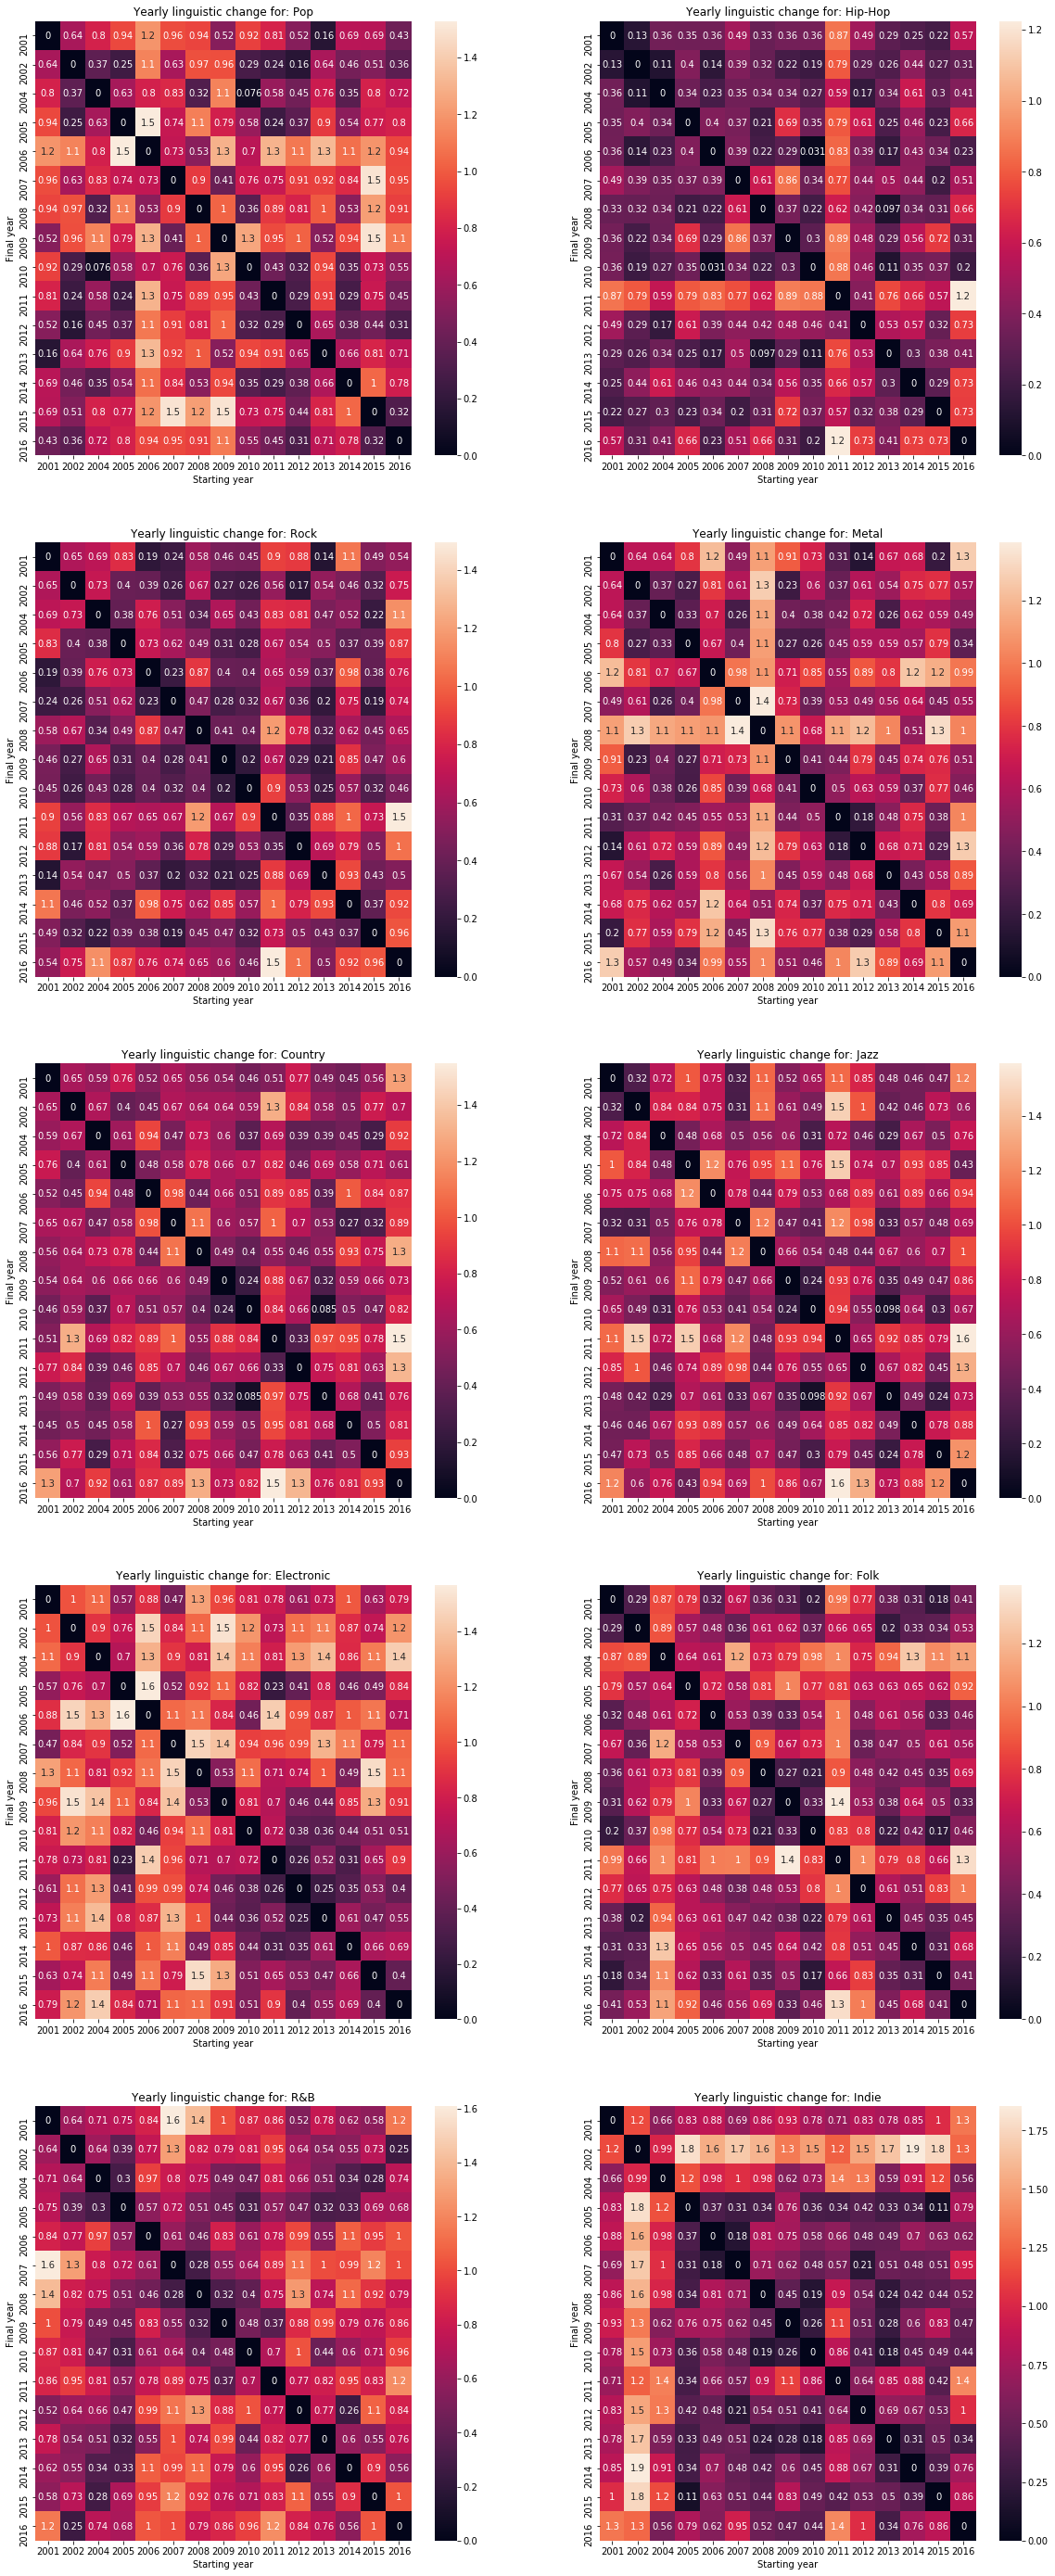

In [33]:
fig = plt.figure(figsize=[20,50])
for i in range(len(genre_year_dfs)):
    ax = fig.add_subplot(5,2,i+1)
    genre = genres[i]
    sns.heatmap(genre_year_dfs[i], ax = ax, annot = True) 
    ax.set_xlabel("Starting year")
    ax.set_ylabel("Final year")
    ax.set_title("Yearly linguistic change for: {}".format(genre))

plt.savefig('Pictures/yearly genre linguistic change_compared')
plt.show()

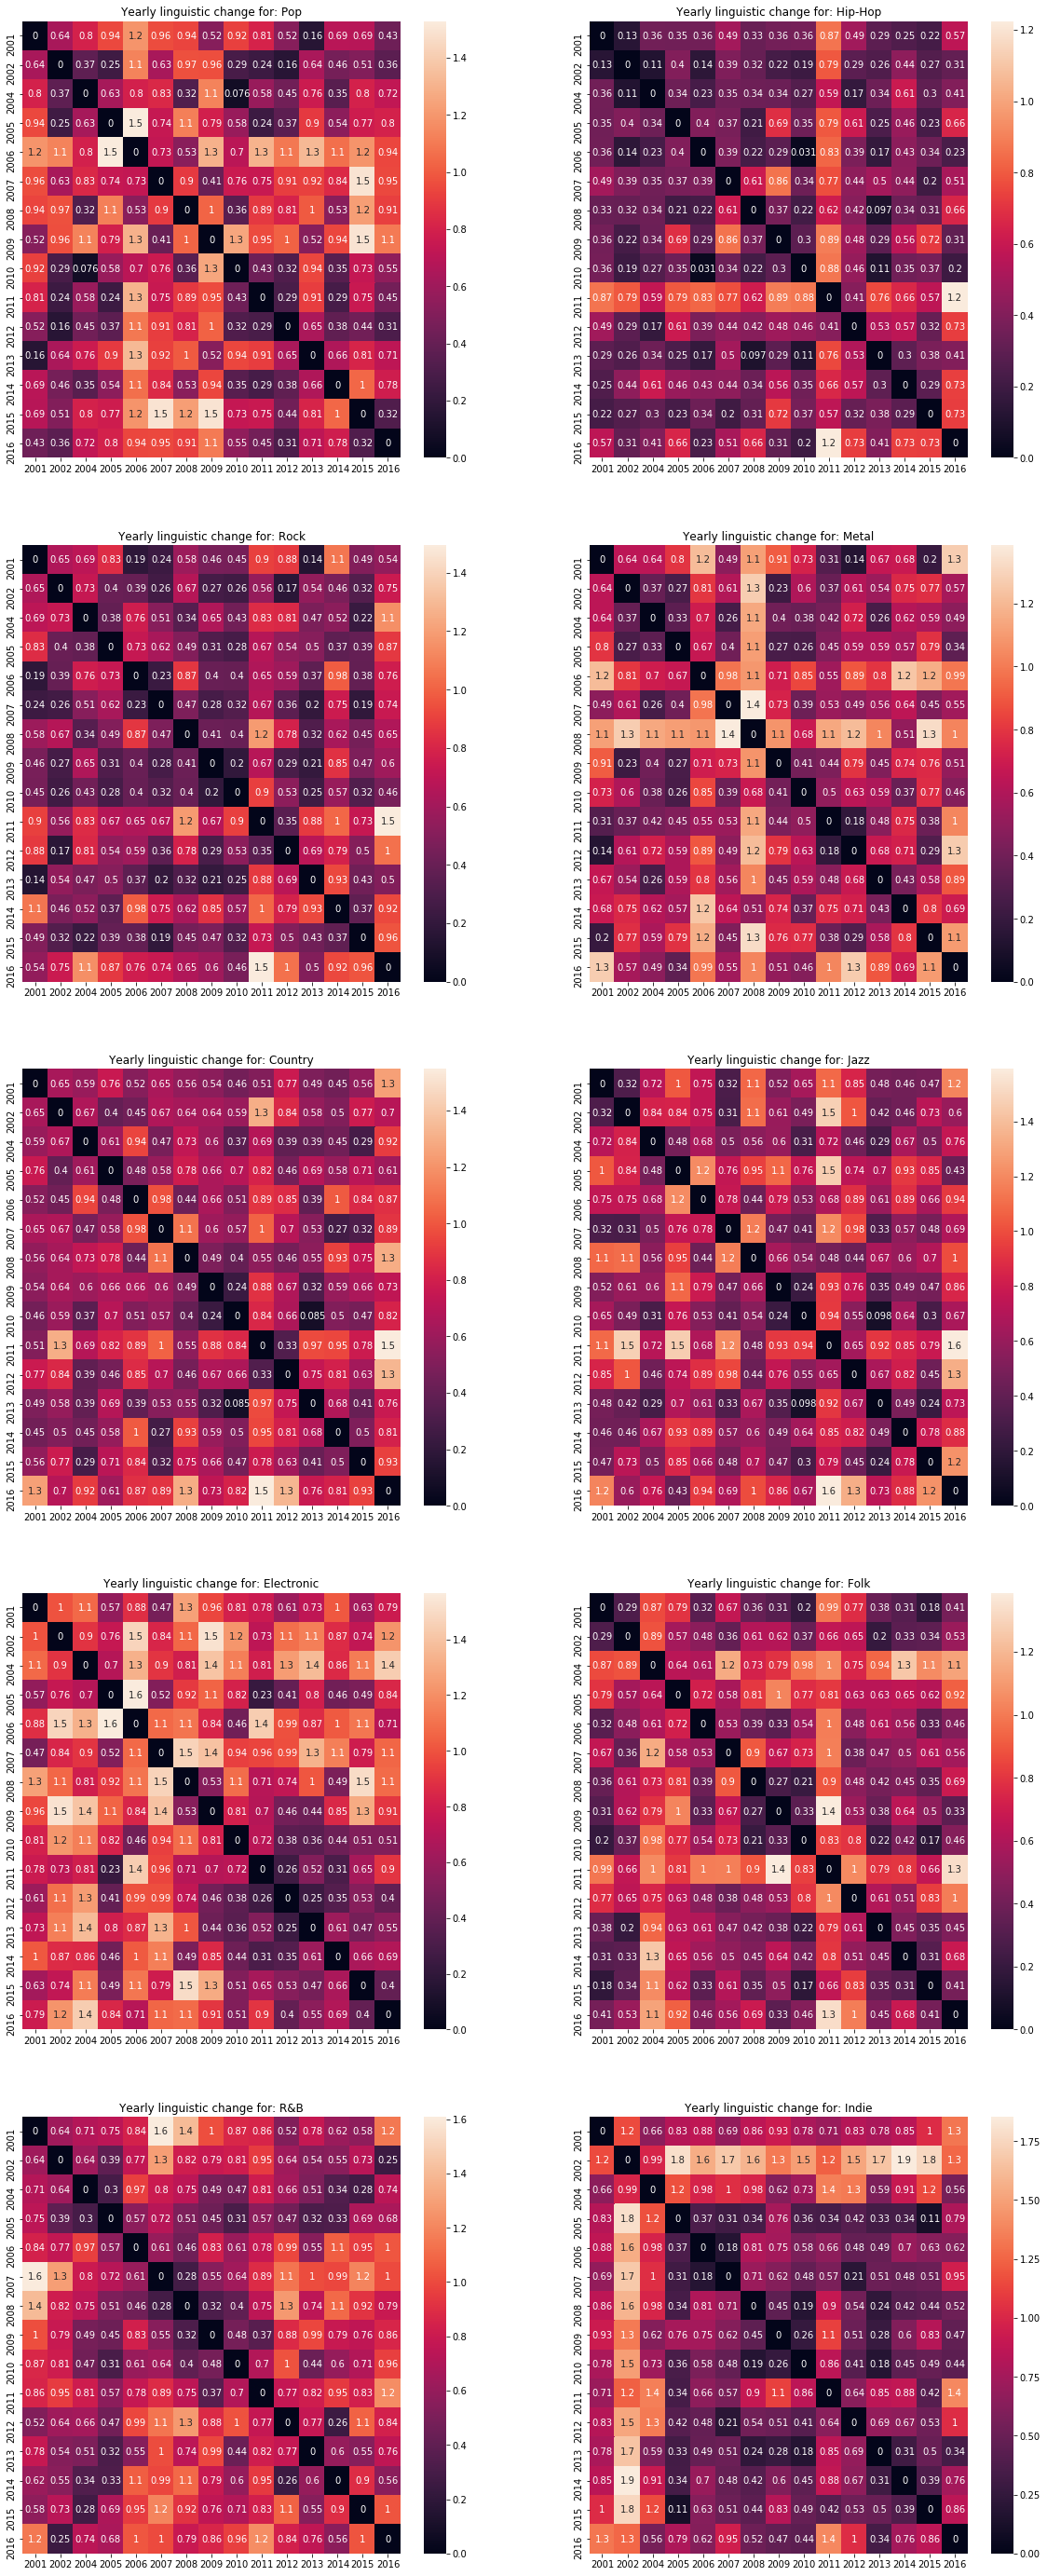

In [25]:
fig = plt.figure(figsize=[20,50])
for i in range(len(raw_dfs)):
    ax = fig.add_subplot(5,2,i+1)
    genre = genres[i]
    sns.heatmap(raw_dfs[i], ax = ax, annot = True) 
    #ax.set_xlabel("Starting year")
    #ax.set_ylabel("Final year")
    ax.set_title("Yearly linguistic change for: {}".format(genre))

plt.savefig('Pictures/yearly genre linguistic change_raw')
plt.show()

In [18]:
for i in range(len(genres)):
    print(genres[i])
    print(genre_year_dfs[i].mean().mean())

Pop
0.6872009228043154
Hip-Hop
0.3950907861524158
Rock
0.5250238525867463
Metal
0.6284250634494755
Country
0.6220173547996415
Jazz
0.6606054335470416
Electronic
0.7937647356372327
Folk
0.5758448007371691
R&B
0.6904011365326329
Indie
0.7086143789605963
